In [177]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [178]:
digits = datasets.load_digits()

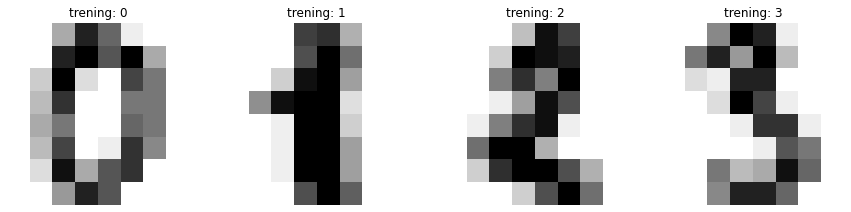

In [179]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(15,4))
for ax,image,label in zip(axes,digits.images,digits.target): 
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f"trening: {label}")

In [180]:
n_samples = len(digits.images)

In [181]:
n_samples

1797

In [182]:
#klasyfikator svm  parametry C - parametr regularyzacji (kontroluje kompromis pomiędzy maksymalizacją marginesu 
#a minimalizacją błędów klasyfikacji), gamma - parametry jądra svm (kontroluje wpływ pojedynczego wektora na decyzję)
clf = svm.SVC(gamma=0.001,C=1)

In [183]:
digits.images.shape

(1797, 8, 8)

In [184]:
#noramlaizacja obrazu - redukcja wymiaru z macierzy 8x8 do wektora o długości 64
data = digits.images.reshape(n_samples,-1)

In [185]:
data.shape

(1797, 64)

In [186]:
#podział zbioru danych na zbiór treningowy i testowy
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.5,shuffle=False)

In [187]:
clf.fit(X_train,y_train)

SVC(C=1, gamma=0.0015) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. SVC SVC(C=1, gamma=0.0015)

In [188]:
predicted = clf.predict(X_test)

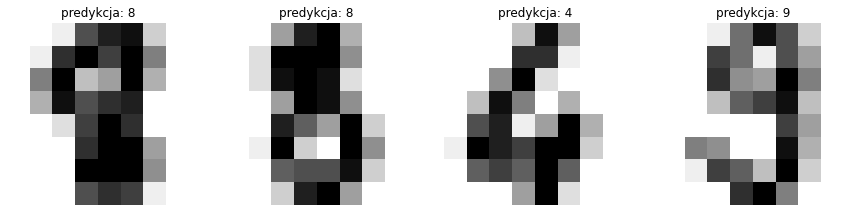

In [189]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(15,4))
for ax,image,prediction in zip(axes,X_test,predicted): 
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f"predykcja: {prediction}")

In [190]:
y_test[0], y_test[1], y_test[2], y_test[3]

(8, 8, 4, 9)

In [191]:
#ocena modelu
print(f"raport klasyfikacyjny dla {clf} ->\n{metrics.classification_report(y_test,predicted)}\n")

raport klasyfikacyjny dla SVC(C=1, gamma=0.0015) ->
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.99      0.98      0.98        91
           2       0.99      0.98      0.98        86
           3       0.99      0.88      0.93        91
           4       0.99      0.96      0.97        92
           5       0.95      0.96      0.95        91
           6       0.99      0.99      0.99        91
           7       0.97      0.99      0.98        89
           8       0.94      1.00      0.97        88
           9       0.90      0.98      0.94        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Text(0.5, 0.98, 'Macierz pomyłek')

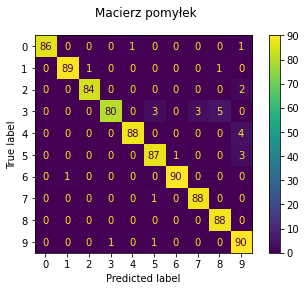

In [192]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz pomyłek")